In [9]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data

In [10]:
df = pd.read_csv("customer-churn-large-dataset-csv-file.csv")

In [11]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [12]:
df.shape

(100000, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [14]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [15]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


# Data Cleaning

In [16]:
# Handling missing values
missing_values = df.isnull()
missing_values_count = missing_values.sum()
missing_values_count

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

No NULL values found.

In [17]:
# Handling Duplicate values
duplicate_rows = df.duplicated()

In [18]:
#Remove duplicated rows if any
df1 = df.drop_duplicates()

In [19]:
#Addressing Outliers
z_scores = (df1 - df1.mean()) / df1.std()
outliers = np.abs(z_scores) > 3

C:\Users\Faith\AppData\Local\Temp\ipykernel_4332\4048251592.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (df1 - df1.mean()) / df1.std()
C:\Users\Faith\AppData\Local\Temp\ipykernel_4332\4048251592.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (df1 - df1.mean()) / df1.std()


In [20]:
outliers.sum()

Age                           0
Churn                         0
CustomerID                    0
Gender                        0
Location                      0
Monthly_Bill                  0
Name                          0
Subscription_Length_Months    0
Total_Usage_GB                0
dtype: int64

No outliers are present

# EDA

In [21]:
df1.shape

(100000, 9)

In [22]:
df1.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [23]:
df1.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [24]:
df1.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

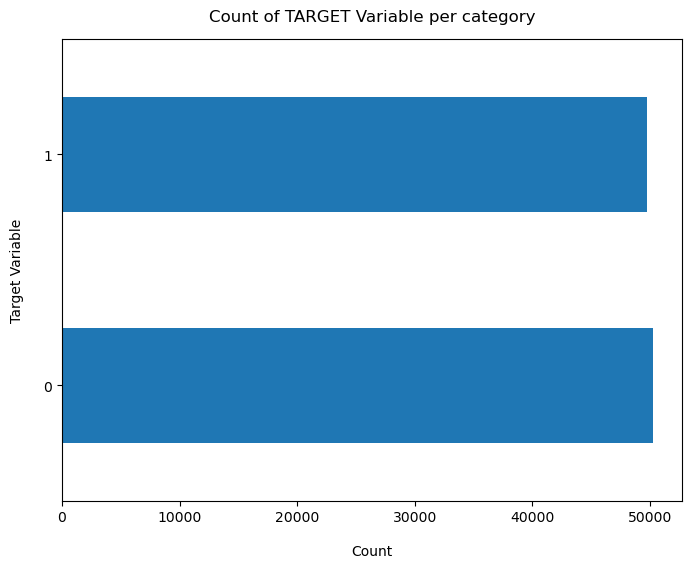

In [25]:
df1['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [26]:
100*df1['Churn'].value_counts()/len(df1['Churn'])

0    50.221
1    49.779
Name: Churn, dtype: float64

In [27]:
df1['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

***Data is properly balanced.***

In [28]:
#Customer ID and Name are not required attributes for the task. So, drop them.
df1.drop(['CustomerID','Name'],axis=1,inplace=True)

In [29]:
df1.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


**Univariate Analysis**

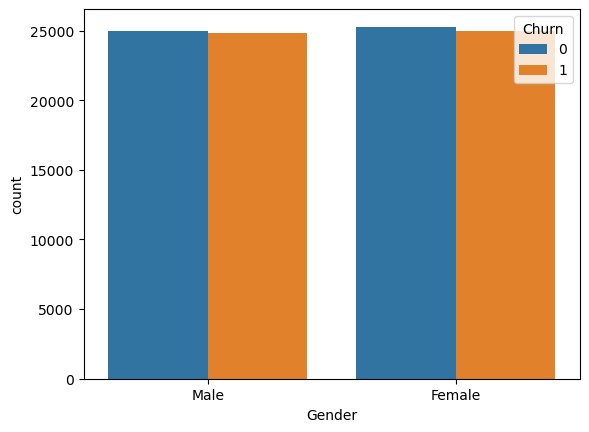

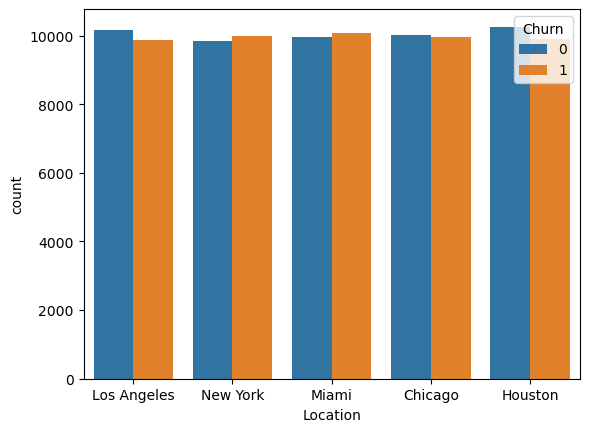

In [30]:
for i, predictor in enumerate(df1.drop(columns=['Churn', 'Age', 'Subscription_Length_Months','Monthly_Bill','Total_Usage_GB'])):
    plt.figure(i)
    sns.countplot(data=df1, x=predictor, hue='Churn')

From above observation we see that the ratio of churners and non churners in both gender is same. Also the number of churners and non-churners at each location are nearly equal.

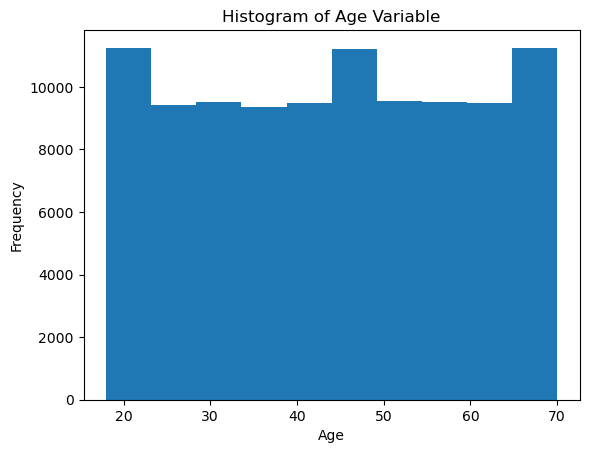

In [31]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(df1['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Variable')
plt.show()

We can see that minimum age is 18 and maximum is 70 and people from each age from 18-70 are present in dataset.

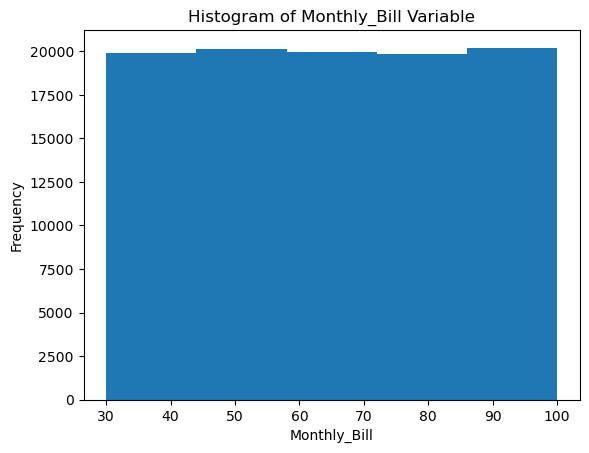

In [32]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(df1['Monthly_Bill'], bins=5)
plt.xlabel('Monthly_Bill')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly_Bill Variable')
plt.show()

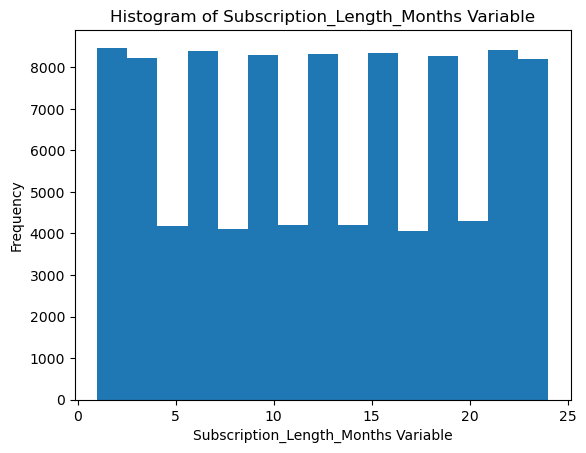

In [33]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(df1['Subscription_Length_Months'], bins=15)
plt.xlabel('Subscription_Length_Months Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Subscription_Length_Months Variable')
plt.show()

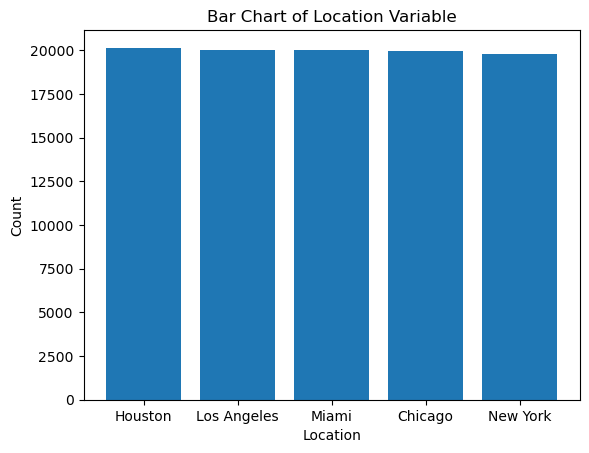

In [34]:
# Plot bar chart
plt.bar(df1['Location'].value_counts().index, df1['Location'].value_counts().values)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Bar Chart of Location Variable')
plt.show()

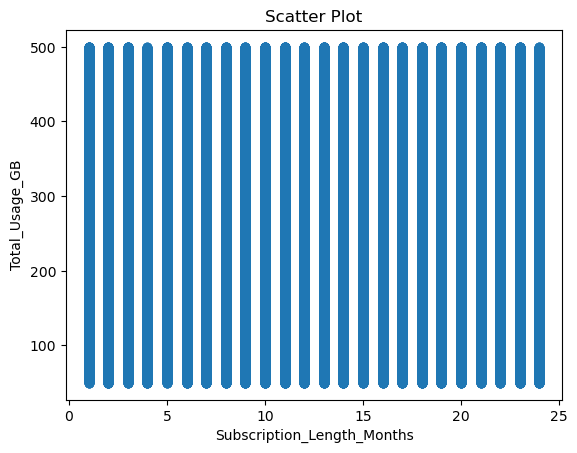

In [35]:
# Plot scatter plot
plt.scatter(df1['Subscription_Length_Months'], df1['Total_Usage_GB'])
plt.xlabel('Subscription_Length_Months')
plt.ylabel('Total_Usage_GB')
plt.title('Scatter Plot')
plt.show()

From all of the above observations we can see that our dataset is uniformly distributed across all the attributes values.

C:\Users\Faith\AppData\Local\Temp\ipykernel_4332\1685359480.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df1.corr(),annot=True)


<Axes: >

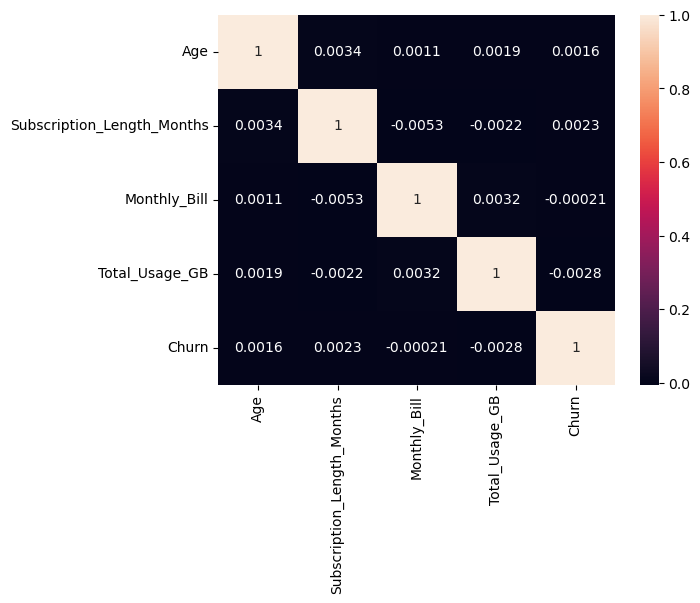

In [36]:
#plotting the heatmap for correlation
ax = sns.heatmap(df1.corr(),annot=True)
ax

In [37]:
df1.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [43]:
df1.dtypes

Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

# Convert all the categorical variables into dummy variables

In [38]:
df_dummies = pd.get_dummies(df1)
df_dummies.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,0,1,0,0,1,0,0
1,62,1,48.76,172,0,1,0,0,0,0,0,1
2,24,5,85.47,460,0,1,0,0,0,1,0,0
3,36,3,97.94,297,1,1,0,0,0,0,1,0
4,46,19,58.14,266,0,1,0,0,0,0,1,0


<Axes: >

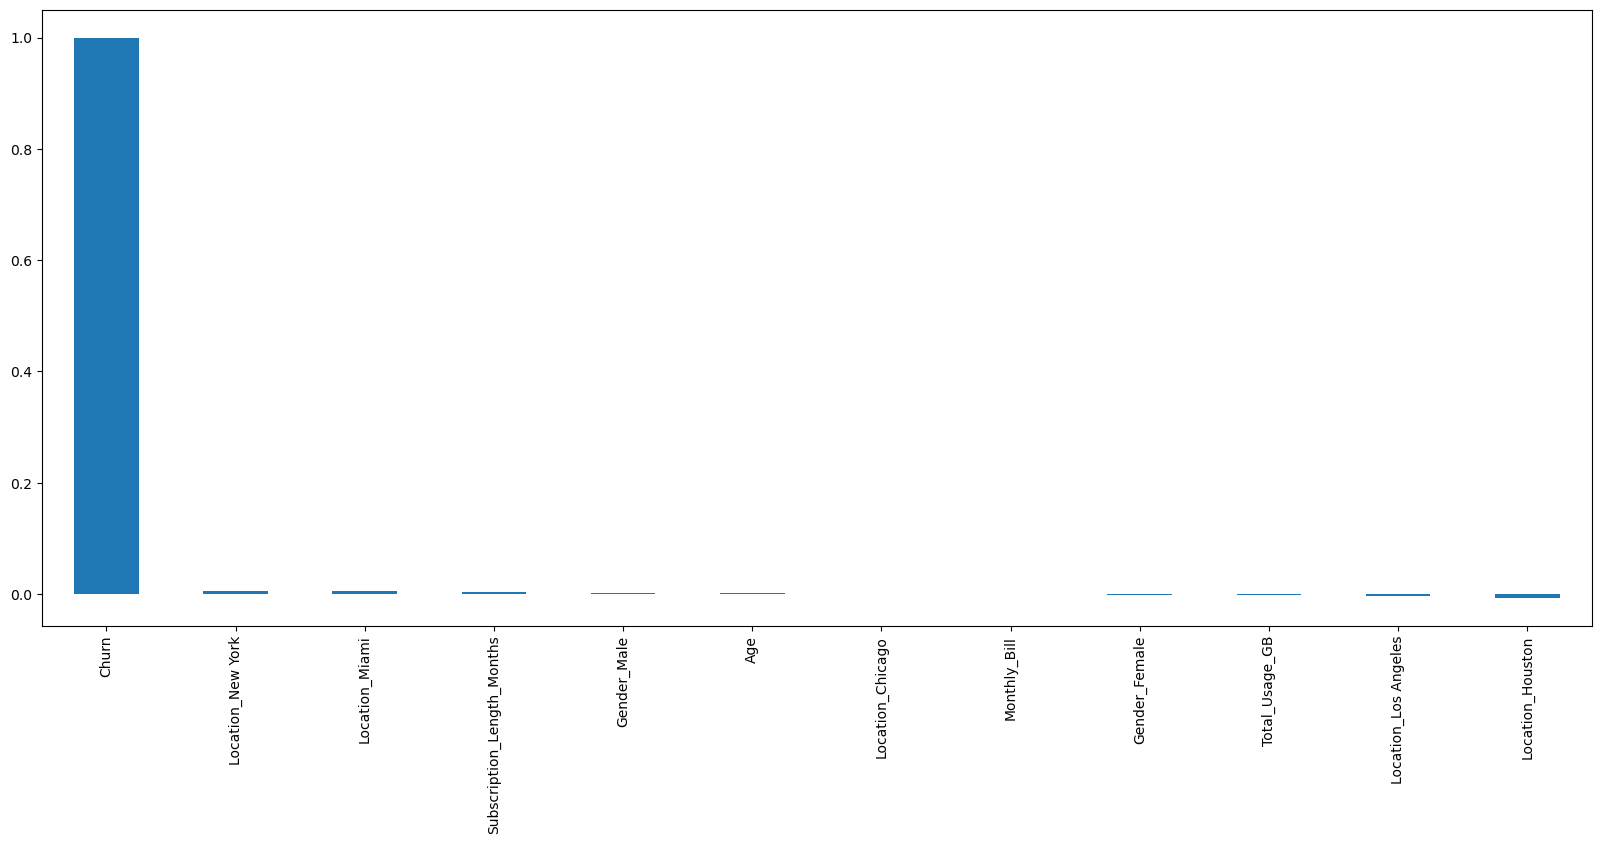

In [39]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Features have very low correlation with Churn variable.

<Axes: >

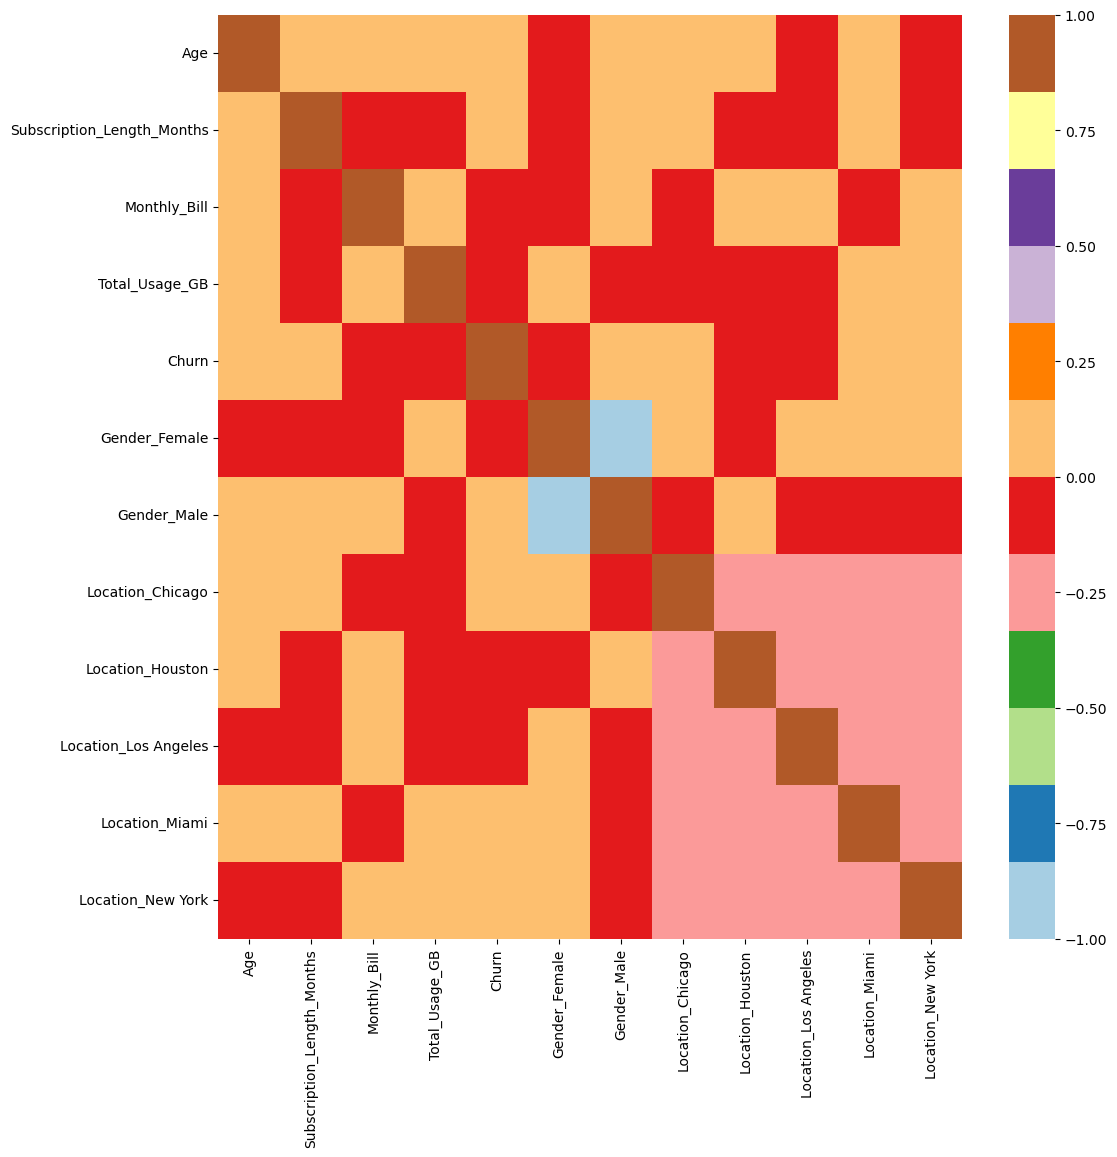

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap="Paired")

***Feature Selection***

In [41]:
correlation_matrix = df_dummies.corr()
# Identify features highly correlated with the target variable ('churn')
highly_correlated_features = correlation_matrix['Churn'][abs(correlation_matrix['Churn']) > 0.1]

# Select the highly correlated features
selected_features = highly_correlated_features.index.tolist()
selected_features.remove('Churn')

# Display the selected features
selected_features

[]

No features are present whose correlation with Churning is more than 0.1.

In [42]:
df_dummies.to_csv('final_df.csv')